Implementing a simple linear regression model 
where the input data is a single feature.

You can implement this for any dataset by making
changes in the cell below the imports


In [2]:
import numpy as np 
import pandas as pd

from scipy.stats import t
import matplotlib.pyplot as plt

In [3]:
#Change RAW DATA here and set the input/output variables accordingly

df = pd.read_csv('C:/Playground/datasets/Advertising.csv', index_col=0)

predictor = 'TV'
response = 'sales'

X = df[predictor].values   # (predictor/input variable)
y = df[response].values  # (response/output variable)

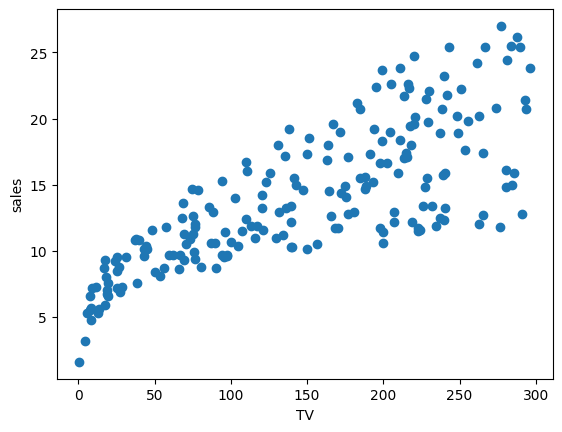

In [4]:
plt.scatter(X, y)   
plt.xlabel(predictor)
plt.ylabel(response)
plt.show()

The coefficients for predicting are being calculated using the following formulaes which are derived from minimizing the RSS (Residual Sum of Squares). If interested in the math i have uploaded my shitty notes because i am too tired to convert it into latex.

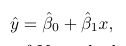



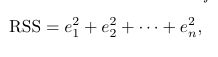

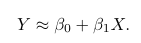

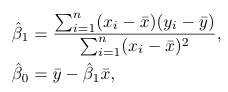

In [5]:
#Basic Calculations
X_mean = np.mean(X)
y_mean = np.mean(y)

#Since beta_0 is dependant on beta_1 , we calculate it first

beta_1 = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
beta_0 = y_mean - beta_1 * X_mean


"""
What do these beta values mean?

beta_1 tells how much the response variable (y) is expected to increase 
when the predictor variable (X) increases by 1 unit.

beta_0 tells the expected value of the response variable (y) 
when the predictor variable (X) is 0.

While these values were computed using the least squares method,
it is important to note that they are estimates of the true population parameters , 
and might not yield the best predictions for all cases.
"""

'\nWhat do these beta values mean?\n\nbeta_1 tells how much the response variable (y) is expected to increase \nwhen the predictor variable (X) increases by 1 unit.\n\nbeta_0 tells the expected value of the response variable (y) \nwhen the predictor variable (X) is 0.\n\nWhile these values were computed using the least squares method,\nit is important to note that they are estimates of the true population parameters , \nand might not yield the best predictions for all cases.\n'

In [6]:
"""
Using these values, we predict the response variable for each value of the predictor variable.
"""

y_pred = beta_0 + beta_1 * X
y_pred

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [8]:
"""
Now that the values have been predicted, we can calculate the residuals and compute the RSS
"""

RSS = np.sum((y - y_pred) ** 2)
RSS

"""
RSS is just the raw measure of total prediction error , and does not provide a good measure of model performance.
Lower RSS = better fit , and can be used to compare models with different predictors.

To get a better measure of model performance, we can calculate RSE (Residual Standard Error).
RSE is the average error per data point , adjusted for the model complexity.

RSE = sqrt(RSS / (n - p)) where where n is the number of observations and p is the number of parameters 
"""

np.float64(2102.5305831313512)

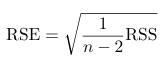

In [10]:
RSE = np.sqrt(RSS / (len(y) - 2))
RSE

"""
Essentially tells me the predicted values are off by +/- 3.26 units on average.

To be noted - units of the dependent variable , in this case sales.

Significance of RSE - If the RSE is high, it means that the model does not fit the data well.
This has to be compared witht the response variable to tell if RSE is large or small.

Ex lets say sales are in the range of 10-100, then RSE of 3.26 is not bad but if sales are 
in the range of 10-20, then RSE of 3.26 is bad.
"""

np.float64(3.2586563686504624)

In [28]:
"""
We have assessed our model based on the coefficients we calculated by minimising the RSS.


The coefficients have been calculated based on the sample data , it is important to
gauge how these coefficients would perform if we were to take different smaples from 
the population.

Standard Errors are computed for beta_0 and beta_1
"""



np.float64(7.0325935491276965)

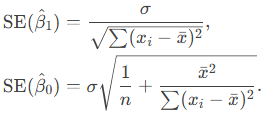

In [13]:
"""
Sigma = RSE computed above
"""




# Sum of squared deviations of x from its mean
SST_X = np.sum((X - X_mean) ** 2)

SE_beta_1 = RSE / np.sqrt(SST_X)
SE_beta_0 = RSE * np.sqrt(1 / len(X) + X_mean ** 2 / SST_X)


In [14]:
SE_beta_1 , SE_beta_0

(np.float64(0.0026906071877968703), np.float64(0.45784294027347855))

In [15]:
beta_0 , beta_1

(np.float64(7.0325935491276965), np.float64(0.047536640433019736))

In [ ]:
"""
We have computed the SE and beta values , now we can compute the t-statistic for each coefficient

If |t| > 2 , then the coefficient is statistically significant.
If |t| < 2 , then the coefficient is not statistically significant.

Standard Errors can thus be used to perform hypothesis testing.

Most common is the null hypothesis which states there is no relationship 
between the predictor (X) and response variable (Y)

H0 : beta_1 = 0 (Since beta_1 is the coefficient of the predictor variable 
    and if beta_1 = 0 the equation reduces to y = beta_0 which means the 
    predictor variable has no effect on the response variable)

The opposite of the null hypothesis is the alternative hypothesis.
Ha : beta_1 != 0
"""



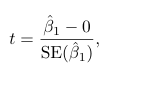


The 0 here corresponds to the hypothesiszed value of our null hyopthesis of beta

In [16]:
t_beta_1 = beta_1 / SE_beta_1
t_beta_0 = beta_0 / SE_beta_0

t_beta_1 , t_beta_0


"""
The null hypothesis can be rejected since t_beta_1 >>>> 2 , 
which means that the predictor variable has an effect on the response variable.
"""

(np.float64(17.667625600875542), np.float64(15.36027517411755))

In [ ]:
# """
# Since the null hypothesis has been rejected, we can calculate the p-value for beta_1
# """

# p_value_beta_1 = 2 * (1 - t.cdf(t_beta_1, len(X) - 2))
# p_value_beta_0 = 2 * (1 - t.cdf(t_beta_0, len(X) - 2))

In [ ]:
"""
Since the null hypothesis has been rejected , we continue with assesting
the accurace of the model.

Quality of a linear regression model is assesed using two related quantities.

RSE - Residual Standard Error
R_Squared - 


RSE while calculated above from the RSS , is an estimate of the standard deviation of the error term.

Remeber there is an error term in the model , which is the difference
 between the true response and the predicted response.

Even if we knew the true regression line, any prediction would stil be off by about RSE units on average.
"""

In [22]:
RSE , y_mean

"""
RSE computed above is 3.26 , and the mean of the response variable is 14.02.

So the percentage error is 3.26 / 14.02 = 23.2%

While the RSE provides an absolute measure of lack of fit of the model, to the data
but it is measured in the units of the response variable. 

It is not always clear what constitutes a good RSE.

R_Squared is an alternative measure of fit.
It is the proportion of variance explained , and is a value between 0 and 1.

R_Squared = 1 - (RSS / TSS)

RSS = Residual Sum of Squares
    The amount of variability left unexplained after performing the regression.
TSS = Total Sum of Squares 
    Total variance in the response Y , the amount of variability inherent in the response
    before the regression is performed

Hence TSS - RSS = amount of variability explained by the model
R_Squared measures the proportion of variability in Y that can be explained using X.

Closer the value to 1 , indicates that a large proportion of the variability 
in the response has been explained by the regression.
"""




(np.float64(3.2586563686504624), np.float64(14.0225))

In [23]:
TSS = np.sum((y - y_mean) ** 2)
R_Squared = 1 - (RSS / TSS)
R_Squared

np.float64(0.611875050850071)

np.float64(14.0225)